# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends
* After collecting and analyzing weather data from 626 random cities around the world using the OpenWeatherMap API, it shows that the temperatures are higher closer to the Equator (0° latitude) for both, northern and southern hemispheres. Since the data is collected in January, the maximum temperatures are lower for northern hemisphere than those in southern hemisphere. This is because of the earth’s rotation around sun.
* There seems to be very little to no correlation between humidity and latitude, as well as cloudiness and latitude. The scatter plots show evenly spread values across the latitudes. 
* Wind speed seems to be similar for latitudes close to the equator (latitudes between 0 and 40 degrees, in both hemispheres).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | waimana
Processing Record 2 of Set 1 | tikrit
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | presidencia roque saenz pena
Processing Record 16 of Set 1 | novyy karachay
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | mata

Processing Record 38 of Set 4 | wahran
City not found. Skipping...
Processing Record 39 of Set 4 | cartagena
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | swedru
Processing Record 42 of Set 4 | sur
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | neiafu
Processing Record 45 of Set 4 | wewak
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | launceston
Processing Record 48 of Set 4 | nola
Processing Record 49 of Set 4 | bac lieu
Processing Record 50 of Set 4 | kavaratti
Processing Record 1 of Set 5 | hovd
Processing Record 2 of Set 5 | noyabrsk
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | hambantota
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | greencastle
Processing Record 7 of Set 5 | tilichiki
Processing Record 8 of Set 5 | nioro
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | san rafael
Processing Record 11 of Set 5 | bela
Processing Record 12 

Processing Record 28 of Set 8 | chongwe
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | provideniya
Processing Record 32 of Set 8 | manoel urbano
Processing Record 33 of Set 8 | san ignacio
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | inirida
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | thai binh
Processing Record 39 of Set 8 | olinda
Processing Record 40 of Set 8 | karabash
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | gamboula
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | matara
Processing Record 46 of Set 8 | rungata
City not found. Skipping...
Processing Record 47 of Set 8 | puerto varas
Processing Record 48 of Set 8 | sarai sidhu
Processing Record 49 of Set 8 | nuuk
Processing Record 50 o

Processing Record 16 of Set 12 | balabac
Processing Record 17 of Set 12 | podgornoye
Processing Record 18 of Set 12 | selikhino
Processing Record 19 of Set 12 | cabra
Processing Record 20 of Set 12 | lanigan
Processing Record 21 of Set 12 | halifax
Processing Record 22 of Set 12 | batagay
Processing Record 23 of Set 12 | taonan
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | phalodi
Processing Record 26 of Set 12 | maykain
City not found. Skipping...
Processing Record 27 of Set 12 | agua verde
Processing Record 28 of Set 12 | coria
Processing Record 29 of Set 12 | wajima
Processing Record 30 of Set 12 | butembo
Processing Record 31 of Set 12 | shache
Processing Record 32 of Set 12 | grand gaube
Processing Record 33 of Set 12 | coos bay
Processing Record 34 of Set 12 | tias
Processing Record 35 of Set 12 | susaki
Processing Record 36 of Set 12 | caravelas
Processing Record 37 of Set 12 | chiredzi
Processing Record 38 of Set 12 | sinjah
City not found. Skipping..

In [4]:
# Check if we got response for all cities
len(lat)
len(temp_max)

626

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not return any response from OpenWeatherMap API.
cities_df = cities_df.dropna(how="any")

In [6]:
# Export the city data into a .csv file.
cities_df.to_csv("./output_data/cities.csv", index=False)

# Display the DataFrame
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waimana,-38.1500,177.0833,66.00,55.0,14.0,5.99,NZ,1.611958e+09
1,tikrit,34.6071,43.6782,49.55,76.0,34.0,6.26,IQ,1.611958e+09
2,isangel,-19.5500,169.2667,82.40,74.0,20.0,15.88,VU,1.611958e+09
3,norman wells,65.2820,-126.8329,-31.00,75.0,20.0,3.44,CA,1.611958e+09
4,rikitea,-23.1203,-134.9692,80.11,67.0,88.0,7.54,PF,1.611958e+09
...,...,...,...,...,...,...,...,...,...
620,egvekinot,66.3167,-179.1667,-21.78,84.0,2.0,10.40,RU,1.611958e+09
621,altay,47.8667,88.1167,3.42,78.0,48.0,1.83,CN,1.611958e+09
622,katsuura,35.1333,140.3000,36.00,48.0,20.0,19.57,JP,1.611958e+09
623,sao paulo de olivenca,-3.3783,-68.8725,79.56,92.0,100.0,1.12,BR,1.611958e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#check if there are any cities with Humidity >100% 
cities_df["Humidity"].describe()

count    578.000000
mean      74.825260
std       18.413193
min       14.000000
25%       65.250000
50%       80.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_101 = cities_df[(cities_df["Humidity"] > 100)].index
humidity_101

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity_101, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waimana,-38.1500,177.0833,66.00,55.0,14.0,5.99,NZ,1.611958e+09
1,tikrit,34.6071,43.6782,49.55,76.0,34.0,6.26,IQ,1.611958e+09
2,isangel,-19.5500,169.2667,82.40,74.0,20.0,15.88,VU,1.611958e+09
3,norman wells,65.2820,-126.8329,-31.00,75.0,20.0,3.44,CA,1.611958e+09
4,rikitea,-23.1203,-134.9692,80.11,67.0,88.0,7.54,PF,1.611958e+09
...,...,...,...,...,...,...,...,...,...
620,egvekinot,66.3167,-179.1667,-21.78,84.0,2.0,10.40,RU,1.611958e+09
621,altay,47.8667,88.1167,3.42,78.0,48.0,1.83,CN,1.611958e+09
622,katsuura,35.1333,140.3000,36.00,48.0,20.0,19.57,JP,1.611958e+09
623,sao paulo de olivenca,-3.3783,-68.8725,79.56,92.0,100.0,1.12,BR,1.611958e+09


In [10]:
# Export the filtered city data into a csv
clean_city_data.to_csv("./output_data/clean_city_data.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

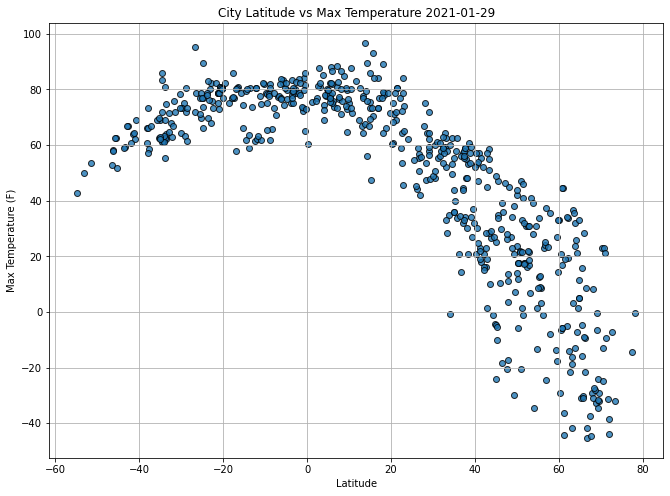

In [11]:
date_now = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_max_temp.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

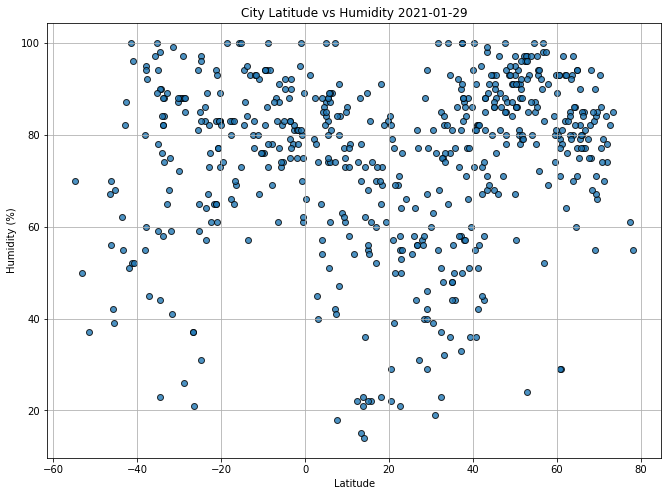

In [12]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date_now}")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

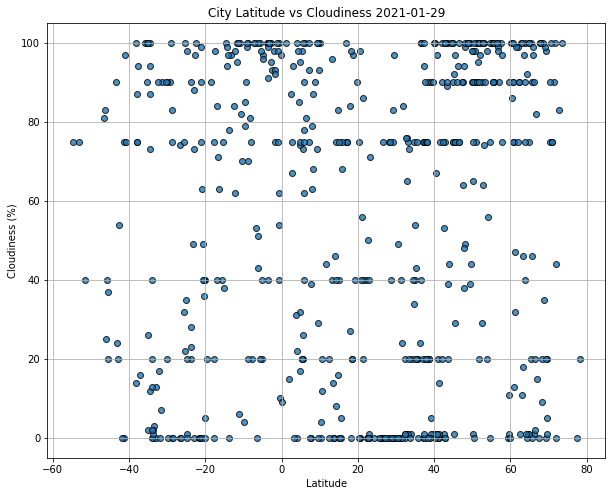

In [13]:

# Create a scatter plot for latitude vs cloudiness.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date_now}")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

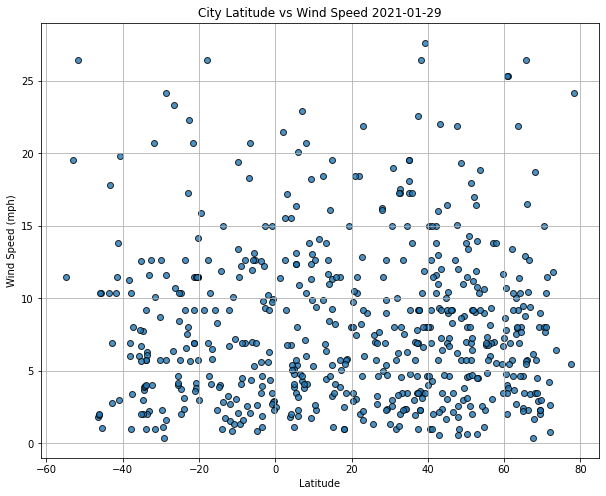

In [14]:
# Create a scatter plot for latitude vs wind speed.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date_now}")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7485887373160589
The correlation between both factors is -0.87


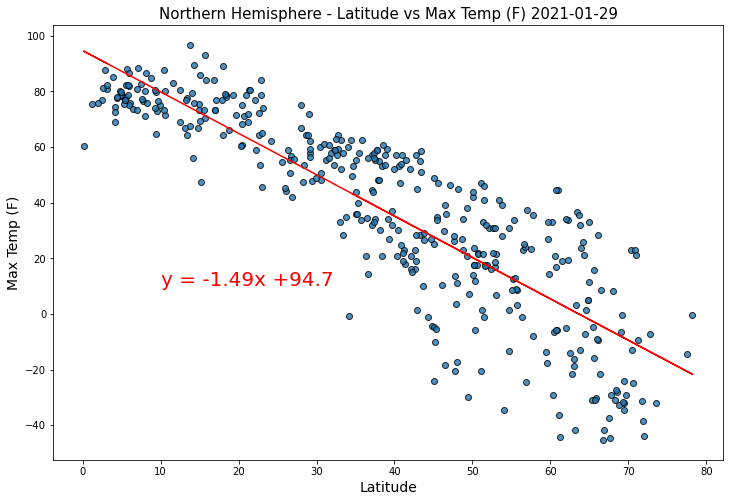

In [17]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3630095755560601
The correlation between both factors is 0.6


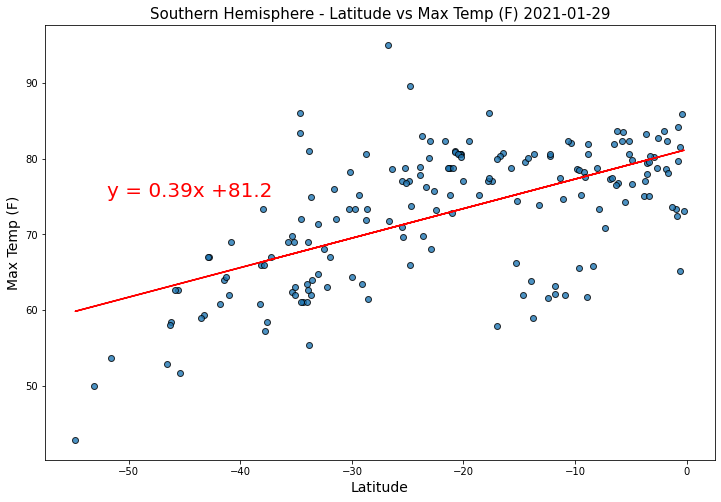

In [18]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

#### The correlation between latitude and maximum temperature is strong for both the hemispheres. It is higher for northern hemisphere (0.87), indicating that as we move away from the equator, the maximum temperature keeps dropping in a more linear manner.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10291515046843693
The correlation between both factors is 0.32


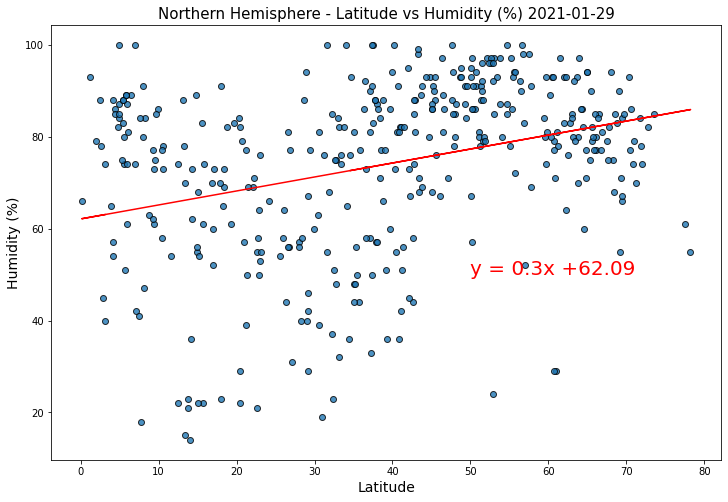

In [19]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08860939126339648
The correlation between both factors is 0.3


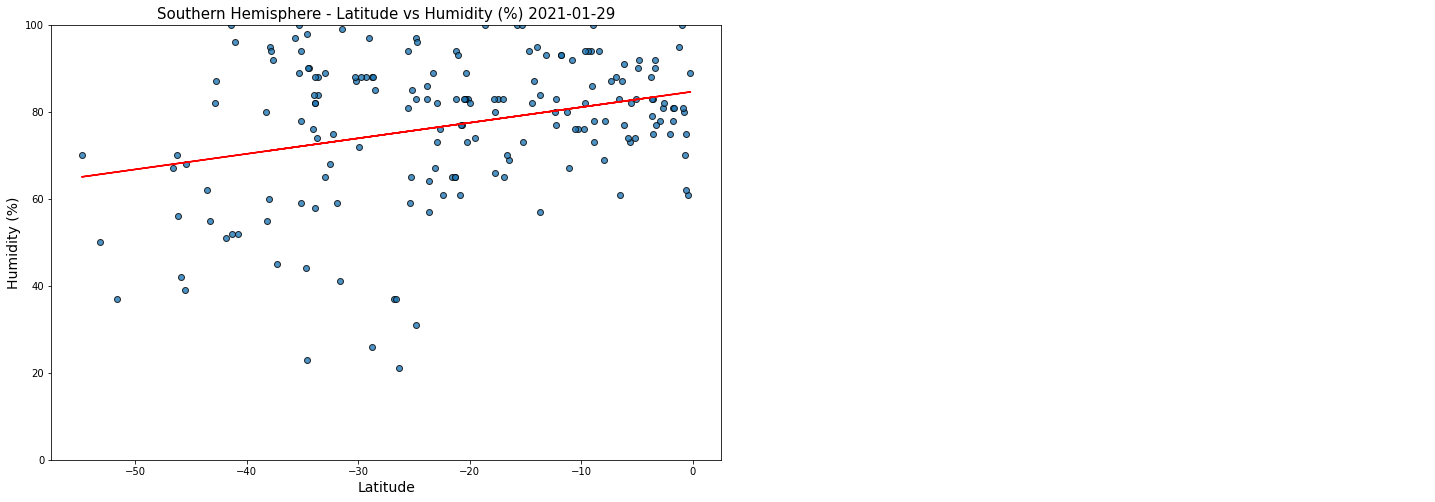

In [20]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

#### There is no correlation between latitude and humidity for southern hemisphere (0.3). For northern hemisphere, it is the same case, expect for the higher latitudes, where we can see some correlation (but not very strong).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.035726429620213
The correlation between both factors is 0.19


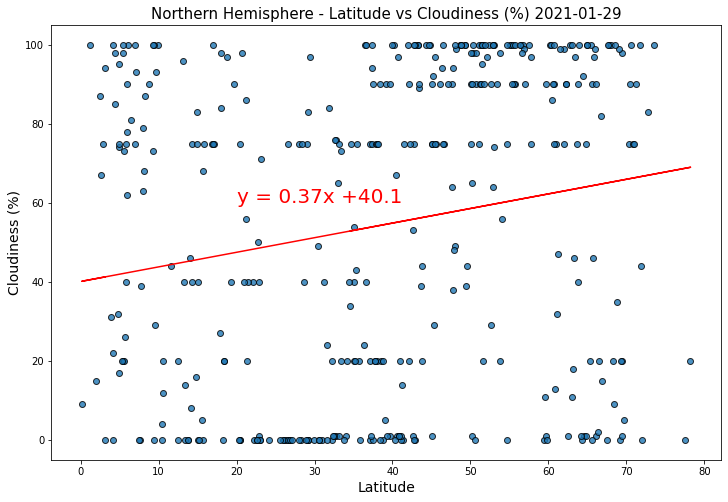

In [21]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08264305961863881
The correlation between both factors is 0.29


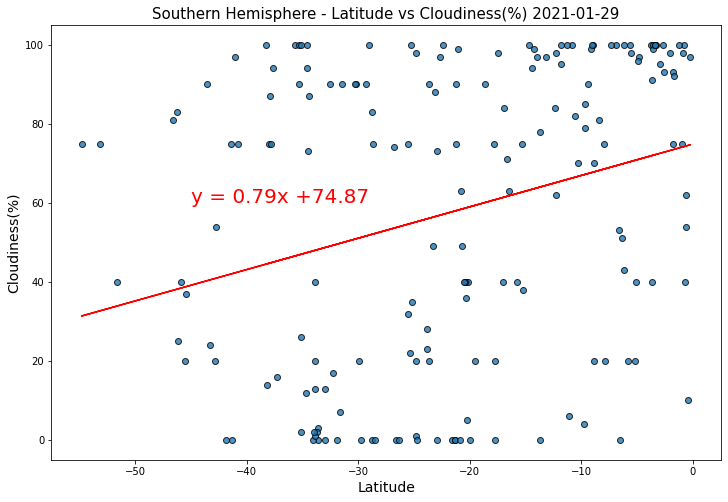

In [22]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

#### There is no correlation between latitude and cloudiness for both, southern and northern hemispheres. Both show scattered values all over the plots. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012726297962499303
The correlation between both factors is -0.04


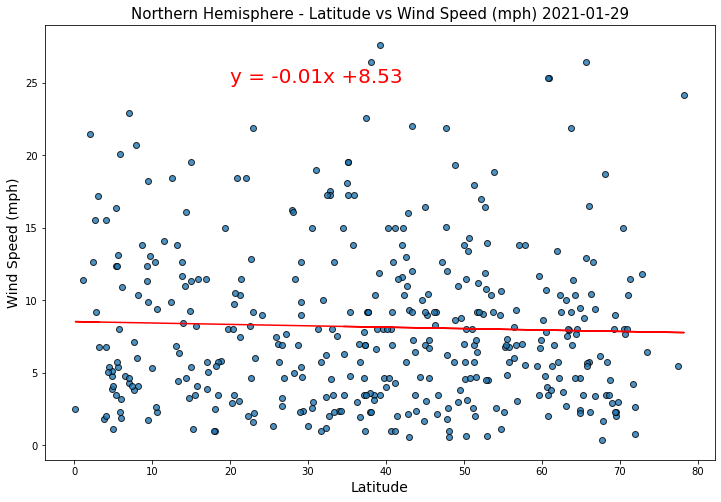

In [23]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006068987073174655
The correlation between both factors is -0.08


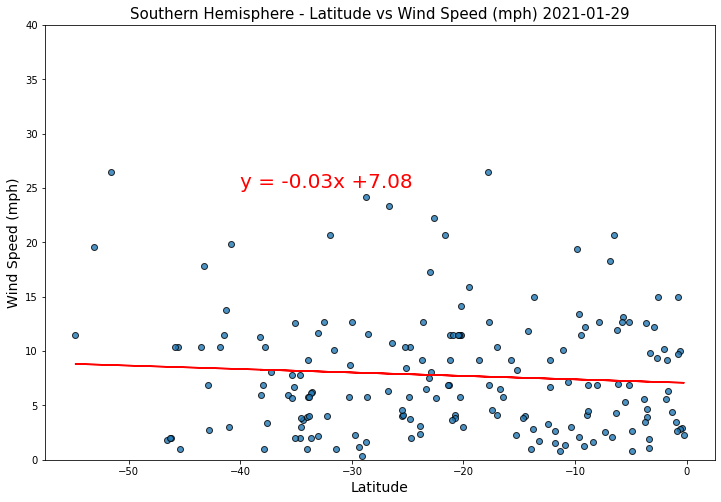

In [24]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

#### There is no correlation between latitude and wind speed either, for both hemispheres. Both show evenly scattered values over the latitudes.